## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

In [1]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 19 (delta 2), reused 1 (delta 1), pack-reused 16
Unpacking objects: 100% (19/19), 3.30 MiB | 11.94 MiB/s, done.


## Task 2 : Loading VGG Pretrained Model

In [3]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained=True)
print(vgg)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [4]:
# we will remove classifier part
# in neural style we only use content and style
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [5]:
# we use the pretrained weights, dont update weights, no gradient computation
for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [7]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [8]:
from PIL import Image
from torchvision import transforms as T

it takes the pixel values of the image tensor, subtracts the mean and then divides by the standard deviation for each channel. This is done to normalize the pixel values so that each channel has a similar range of values (mean 0 and standard deviation of 1) and to make sure the model converges faster and gives better performance during training.

The mean and standard deviation values used in the transformation are obtained from the ImageNet dataset, which is a common benchmark dataset for image classification tasks.

In [9]:
def preprocess(image_path, max_size=500):
  image = Image.open(image_path).convert('RGB')
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)
  
  img_transformation = T.Compose([T.Resize(size),
                                  T.ToTensor(),
                                  T.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])])
  image = img_transformation(image)
  # add batch size: (c, h, w) -> (m, c, h, w)
  # img is already (c, h, w) since use torchvision.transforms
  image = image.unsqueeze(0)
  return image

In [10]:
content_p = preprocess('/content/Project-NST/content11.jpg')
style_p = preprocess('/content/Project-NST/style11.jpg')

In [11]:
content_p = content_p.to(device)
style_p = style_p.to(device)
print('Content Shape:', content_p.shape)
print('Style Shape:', style_p.shape)

Content Shape: torch.Size([1, 3, 259, 345])
Style Shape: torch.Size([1, 3, 500, 577])


## Task 4 : Deprocess image

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# in the end we need to plot image
# inverse of preprocess
def deprocess(tensor):
  image = tensor.to('cpu').clone()
  image = image.numpy()
  image = image.squeeze(0) # (m, c, h, w) -> (c, h, w)
  image = image.transpose(1,2,0)  #(c, h, w) -> (h, w, c)
  image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
  image = image.clip(0, 1)
  return image

In [14]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)
print('Deprocess content:', content_d.shape)
print('Deprocess style:', style_d.shape)

Deprocess content: (259, 345, 3)
Deprocess style: (500, 577, 3)


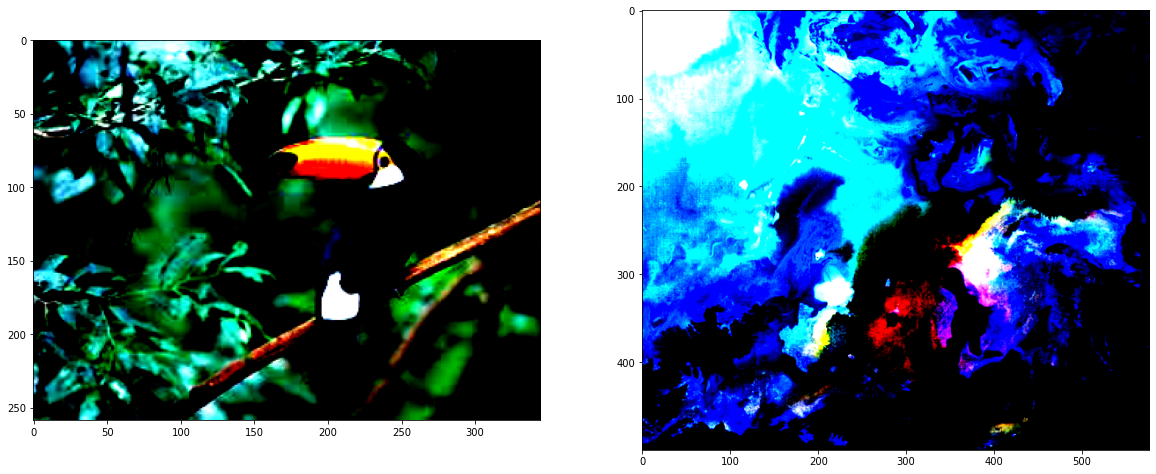

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

it extracts the feature maps from certain convolutional layers of the model and stores them as separate entries in the Features dictionary.

In [25]:
def get_features(image,model):
  layers={
      '0': 'conv1_1',
      '5': 'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2',  # content_feature
      '28': 'conv5_1'
  }
  x = image
  Features = {}
  for name, layer in model._modules.items():
    x = layer(x)
    if name in layers:
      Features[layers[name]] = x
  return Features

In [26]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

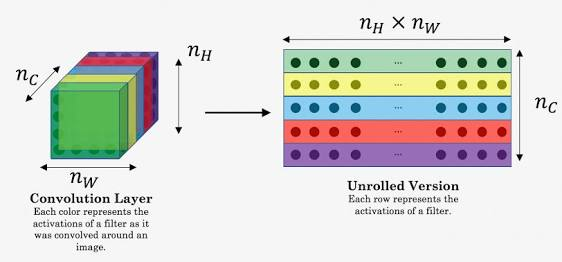

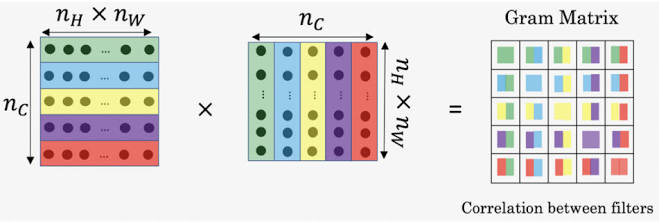

In [27]:
def gram_matrix(tensor):
  b, c, h, w = tensor.size()
  tensor = tensor.view(c, h*w)  # unroll
  gram = torch.mm(tensor, tensor.t()) # matrix multiplication w/ its transpose
  return gram

Since feature maps in style aren't independent we need to create style gram.

In [28]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [29]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [30]:
style_weights = {
    'conv1_1': 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.2,
    'conv4_1': 0.2,
    'conv5_1': 0.2
}

The output image which is target_feature must have the same corrollation as style grams.
its feature must have the same corrollation.

In [31]:
def style_loss(style_weights, target_features, style_grams):
  loss = 0.0
  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    b, c, h, w = target_f.shape
    loss += layer_loss/(c*h*w)
  return loss

In [32]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)
print('Content loss:', content_loss(target_f['conv4_2'], content_f['conv4_2']))
print('Style loss:', style_loss(style_weights, target_f, style_grams))

Content loss: tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style loss: tensor(2837.5439, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [33]:
from torch import optim

optimizer = optim.Adam([target], lr=0.003)

alpha = 1
beta = 1e5

epochs = 3000
show_every = 500

In [34]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha*c_loss + beta*s_loss
  return loss

In [35]:
results = []

for i in range(epochs):
  target_f = get_features(target, vgg)

  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print('Total loss at epoch %d: %f'%(i, t_loss))
    results.append(deprocess(target.detach()))

Total loss at epoch 0: 283754400.000000
Total loss at epoch 500: 20908470.000000
Total loss at epoch 1000: 9374949.000000
Total loss at epoch 1500: 7143934.000000
Total loss at epoch 2000: 5866839.500000
Total loss at epoch 2500: 5047811.000000


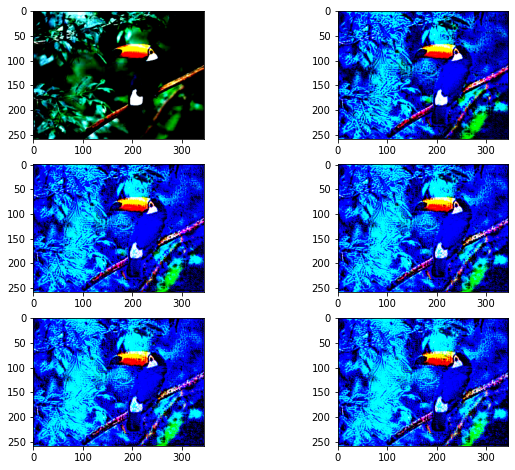

In [36]:
plt.figure(figsize=(10, 8))

for i in range(len(results)):
  plt.subplot(3, 2, i+1) # 3row-2cols
  plt.imshow(results[i])

plt.show()

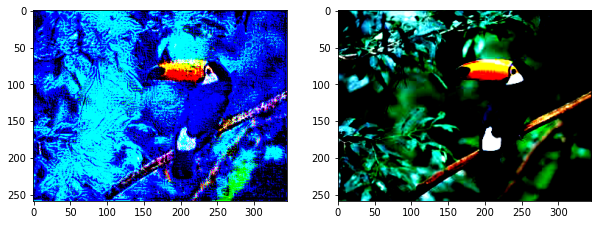

In [37]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)